In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from classification_1_parsing_parrotorno import make_dictionnary
#Style of the figure
plt.style.use('seaborn-whitegrid')

In [2]:


# Create a SQL connection to our SQLite database
con = sqlite3.connect("DATABASES/project.db")

cur = con.cursor()

ana_df = pd.read_sql_query("SELECT * from classification_1_analysis", con)
map_df= pd.read_sql_query("SELECT * from mapping_cites", con)

In [3]:
%%capture
bag_of_words=make_dictionnary();

amazona arausiaca
psittacus
arausiacus
amazone
bouquet
amazone
red-necked
amazon
jacquot
red-necked
parrot
amazona
gorjirroja
amazona
cabenazul
amazona
cabeza
azul
amazona
gorgirroja
amazona auropalliata
psittacus
auro-palliatus
amazona
ochrocephala
auropalliata
amazone
nuque
yellow-naped
amazon
amazona
nuquigualda
amazona barbadensis
psittacus
barbadensis
gmelin
amazone
épaulettes
jaunes
amazone
barbade
yellow-shouldered
amazon
psittacus
carolinensis
scopoli
psittacus
ochropterus
gmelin
amazona
aestiva
ochroptera
amazona
ochroptera
androglossa
ochroptera
androglossus
ochropterus
chrysotis
ochroptera
chrysotis
ochropterus
amazona
icterocephala
lesson
chrysotis
xanthocephalus
swainson
chrysotis
lactifrons
lawrence
chrysotis
canifrons
lawrence
chrysotis
rothschildi
hartert
amazona
barbadensis
rothschildi
amazona
rothschildi
amazona
hombrogualda
amazona
hombro
gualda
amazona
espalda
amarilla
amazona
hombrogualda
cotorra
cabeciamarilla
amazona brasiliensis
amazone
joues
bleues
red-tailed
a

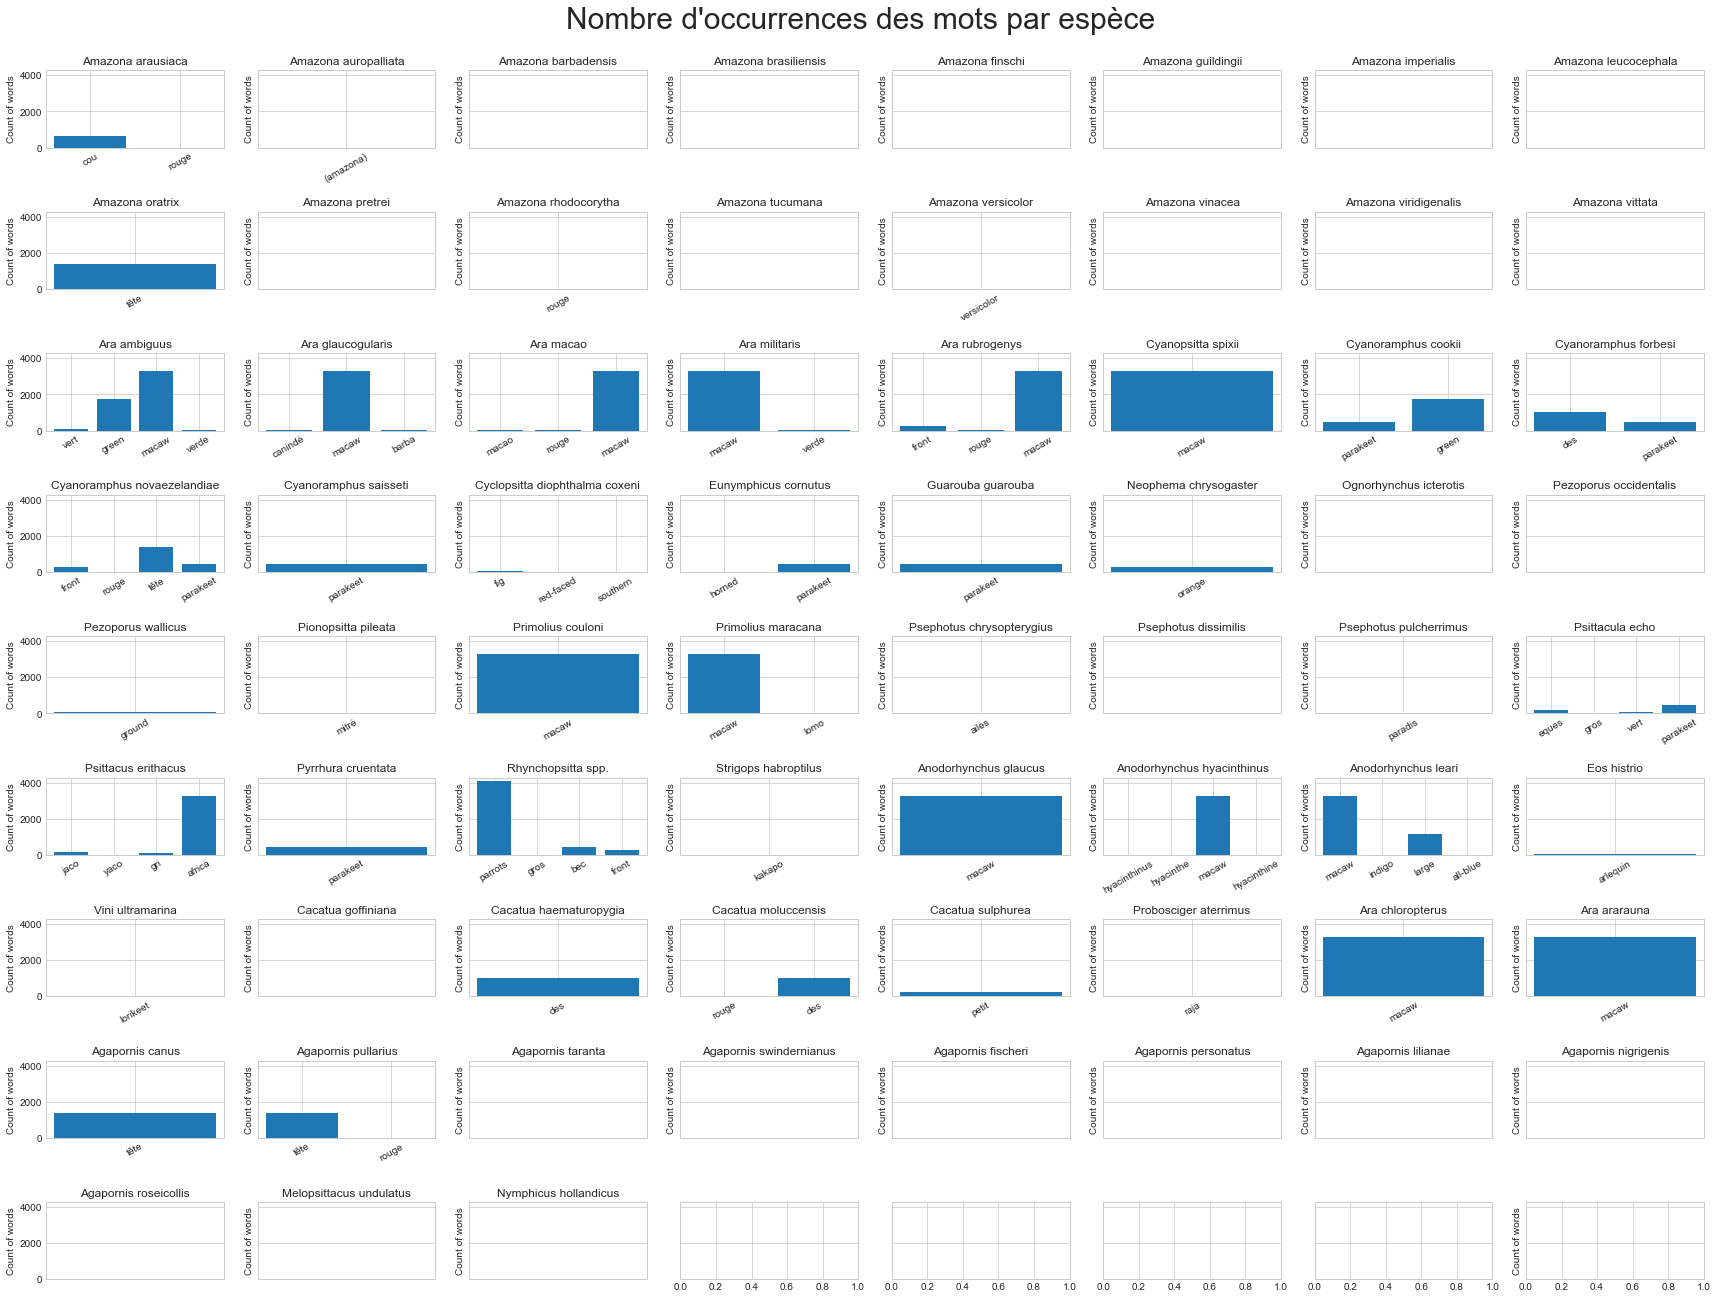

In [4]:

fig, axes = plt.subplots(9, 8,figsize= (24,18), sharey = True, sharex = False, frameon=True)
for i in range(0,len(map_df)-1,1):
    sbplt = axes[math.floor((i)/8), (i)%8]
    words=bag_of_words[i+1];
    list_tot=[]
    list_words=[] #Different of the provided words because not all have a match
    for word in words :
        if word not in list_words :
            try :
                total=ana_df[f"word_{word}"].sum()
                list_tot.append(total)
                list_words.append(word)
            except :
                print(f"{word}")
        else : 
            pass
    x = np.arange(len(list_words))
    sbplt.bar(x, list_tot)
    title=map_df.at[i, "scientific_name_cites"]
    sbplt.set_title(f"{title}")
    sbplt.set_ylabel('Count of words')
    sbplt.set_xticks(x)
    sbplt.set_xticklabels(list_words, rotation=30)
    
plt.ylabel("Count of words")
fig.suptitle("Nombre d'occurrences des mots par espèce", y=1, fontsize=30)
fig.tight_layout()
plt.savefig(f"./graphes/classification_1_small_multiples.png", format="png",bbox_inches='tight')
#sbplt.legend()
# ax[2,1].set_visible(False)